### 1. Import libraries and get data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("./USDT.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Format the 'Date' column in the 'dd-mm-yyyy' format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-12-01,1.0100
2017-12-02,0.9959
2017-12-03,0.9977
2017-12-04,1.0000
2017-12-05,1.0000
...,...
2023-03-28,1.0001
2023-03-29,0.9999
2023-03-30,1.0000


In [3]:
# Split the data into training (70%) and test (30%) sets
train_size = int(0.7 * len(df))

train = df[:train_size]
test = df[train_size:]

# Check the sizes of the data sets
print("Train shape:", train.shape)
print("Test shape:", test)

Train shape: (1362, 1)
Test shape:              Price
Date              
2021-08-25  1.0002
2021-08-26  1.0003
2021-08-27  1.0006
2021-08-28  1.0006
2021-08-29  1.0007
...            ...
2023-03-28  1.0001
2023-03-29  0.9999
2023-03-30  1.0000
2023-03-31  1.0001
2023-04-01  1.0002

[585 rows x 1 columns]


### 3. Perfom ARIMA Model 

In [12]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pmdarima as pmd

arima_model = pmd.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-11684.760, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3868.101, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.92 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-11723.739, Time=0.75 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-11721.681, Time=0.48 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-11723.605, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-11721.615, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-11756.317, Time=0.71 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-11102.504, Time=1.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-11738.216, Time=1.10 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=

### 3.1 Build the ARIMA Model

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# ARMIA(1,0,2)
model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1362
Model:                 ARIMA(1, 0, 2)   Log Likelihood                5888.000
Date:                Wed, 03 May 2023   AIC                         -11765.999
Time:                        02:00:47   BIC                         -11739.916
Sample:                             0   HQIC                        -11756.235
                               - 1362                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0003      0.001    918.580      0.000       0.998       1.002
ar.L1          0.9526      0.005    187.338      0.000       0.943       0.963
ma.L1         -0.2626      0.013    -19.787      0.0

### 3.2 Predict on Test data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1363    1.000350
1364    1.000349
1365    1.000347
1366    1.000345
1367    1.000344
          ...   
1943    1.000313
1944    1.000313
1945    1.000313
1946    1.000313
1947    1.000313
Name: predicted_mean, Length: 585, dtype: float64


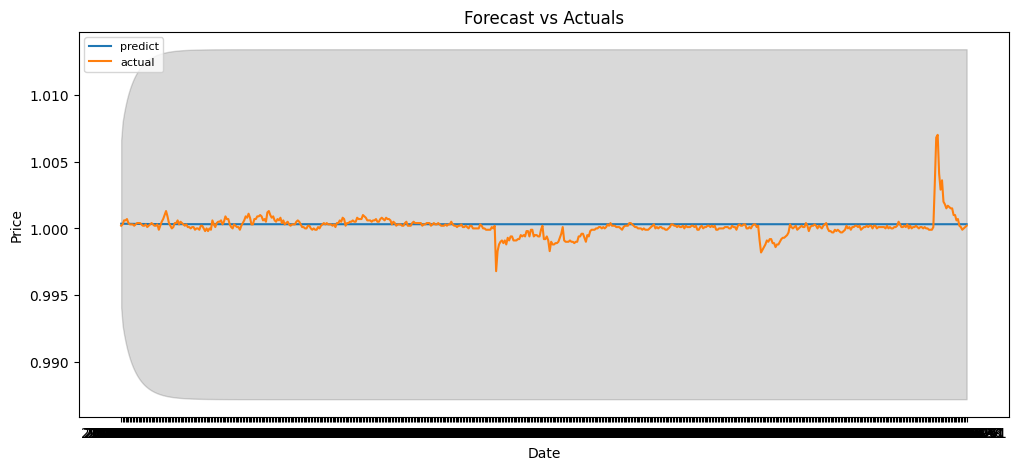

In [28]:
# Forecast
predict_price = model_fit.predict(start=1363, end=1947)
predict_results = model_fit.get_forecast(585)

print(predict_price)

# Confidence
conf = predict_results.conf_int(alpha=0.05)

# Make as pandas series
predict = pd.Series(predict_price.values, index=test.index)
lower = pd.Series(conf['lower Price'].values, index=test.index)
upper = pd.Series(conf['upper Price'].values, index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(predict, label='predict')
plt.plot(test, label='actual')
plt.fill_between(lower.index, lower, upper, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc='upper left', fontsize=8)
plt.show()

### 3.Predict 10 days later

In [26]:
price_30_days_later = model_fit.predict(start=1948, end=1978)
price_30_days_later

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1948    1.000313
1949    1.000313
1950    1.000313
1951    1.000313
1952    1.000313
1953    1.000313
1954    1.000313
1955    1.000313
1956    1.000313
1957    1.000313
1958    1.000313
1959    1.000313
1960    1.000313
1961    1.000313
1962    1.000313
1963    1.000313
1964    1.000313
1965    1.000313
1966    1.000313
1967    1.000313
1968    1.000313
1969    1.000313
1970    1.000313
1971    1.000313
1972    1.000313
1973    1.000313
1974    1.000313
1975    1.000313
1976    1.000313
1977    1.000313
1978    1.000313
Name: predicted_mean, dtype: float64

### 4.  Evaluate ARIMA Model

In [ ]:
#MAPE
def mean_absolute_percentage_error(predict, actual):
    return np.mean(np.abs(predict - actual)/np.abs(actual))

mean_absolute_percentage_error(predict, test['Price'])

0.0004200786309264163

In [ ]:
#MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['Price'], predict)

0.00042020880033603116

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(test['Price'], predict)

5.328105955115118e-07

### 2. SARIMAX Model

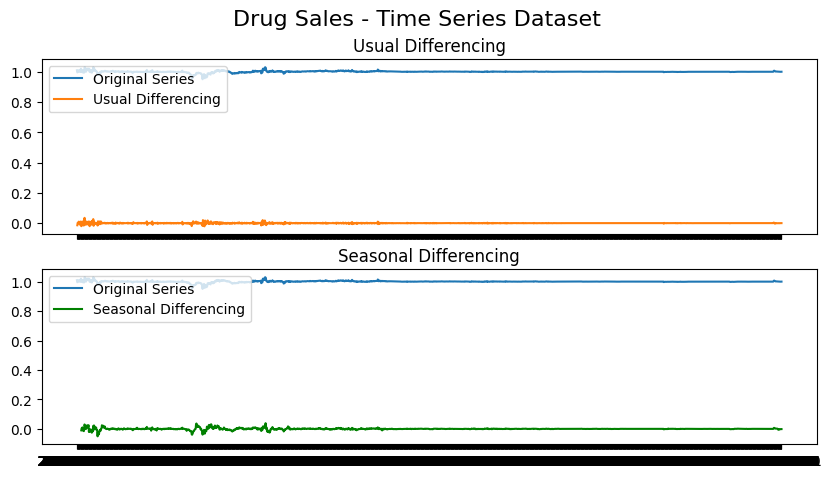

In [9]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

- Now, let’s build the SARIMA model using pmdarima‘s auto_arima(). To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [10]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pmd.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-11250.862, Time=12.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-9624.032, Time=0.76 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-11167.070, Time=12.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-10615.909, Time=10.01 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-9625.977, Time=0.21 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-10737.082, Time=3.62 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-11229.075, Time=6.08 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-11265.275, Time=29.57 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-11239.144, Time=41.68 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-10702.796, Time=54.16 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-11434.052, Time=65.39 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-11204.118, Time=7.98 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=-11179.966, Time=53.06 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-11193.704,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1362
Model:             SARIMAX(3, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                5761.295
Date:                                 Wed, 03 May 2023   AIC                         -11506.591
Time:                                         02:43:16   BIC                         -11464.928
Sample:                                              0   HQIC                        -11490.988
                                                - 1362                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.272e-05   4.33e-05     -0.294      0.769   -9.77e-05    7.22e-05
ar.L1          0.3227      0.109      2.952      0.003       0.108       0.537
ar.L2          0.3346      0.076      4.391      0.000       0.185       0.484
ar.L3          0.1799      0.022      8.012      0.000       0.136       0.224
ma.L1          0.3344      0.108      3.087      0.002       0.122       0.547
ma.S.L12      -0.9113      0.015    -60.773      0.000      -0.941      -0.882
ma.S.L24       0.2349      0.015     15.980      0.000       0.206       0.264
sigma2      1.142e-05   1.74e-07     65.697      0.000    1.11e-05    1.18e-05
===================================================================================
Ljung-Box (L1) (Q):                   6.24   Jarque-Bera (JB):             12848.34
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\PHUTRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass.

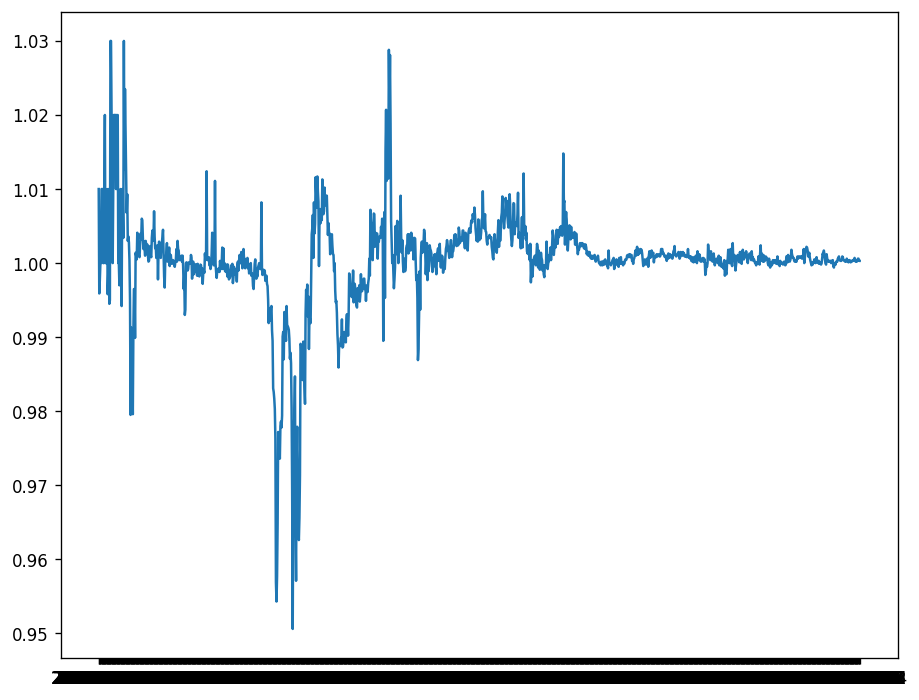

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()